In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mtsamples.csv')

In [9]:
df.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [10]:
df.shape

(4999, 6)

# Data Preprocessing

In [11]:
df.isnull().sum()

Unnamed: 0              0
description             0
medical_specialty       0
sample_name             0
transcription          33
keywords             1068
dtype: int64

In [12]:
df = df.dropna(subset=['transcription'])


In [14]:
df.shape

(4966, 6)

# Exploring Categories

In [20]:
data_categories = df.groupby(df['medical_specialty'])
for i, (catName, dataCategory) in enumerate(data_categories, 1):
    print(f'Cat:{i} {catName} : {len(dataCategory)}')

Cat:1  Allergy / Immunology : 7
Cat:2  Autopsy : 8
Cat:3  Bariatrics : 18
Cat:4  Cardiovascular / Pulmonary : 371
Cat:5  Chiropractic : 14
Cat:6  Consult - History and Phy. : 516
Cat:7  Cosmetic / Plastic Surgery : 27
Cat:8  Dentistry : 27
Cat:9  Dermatology : 29
Cat:10  Diets and Nutritions : 10
Cat:11  Discharge Summary : 108
Cat:12  ENT - Otolaryngology : 96
Cat:13  Emergency Room Reports : 75
Cat:14  Endocrinology : 19
Cat:15  Gastroenterology : 224
Cat:16  General Medicine : 259
Cat:17  Hematology - Oncology : 90
Cat:18  Hospice - Palliative Care : 6
Cat:19  IME-QME-Work Comp etc. : 16
Cat:20  Lab Medicine - Pathology : 8
Cat:21  Letters : 23
Cat:22  Nephrology : 81
Cat:23  Neurology : 223
Cat:24  Neurosurgery : 94
Cat:25  Obstetrics / Gynecology : 155
Cat:26  Office Notes : 50
Cat:27  Ophthalmology : 83
Cat:28  Orthopedic : 355
Cat:29  Pain Management : 61
Cat:30  Pediatrics - Neonatal : 70
Cat:31  Physical Medicine - Rehab : 21
Cat:32  Podiatry : 47
Cat:33  Psychiatry / Psycholo

In [21]:
filtered_categories = data_categories.filter(lambda x: x.shape[0] > 50)
final_categories = filtered_categories.groupby(
    filtered_categories['medical_specialty'])
counter = 1
for category_name, category_data in final_categories:
    print(f'Cat:{counter} {category_name} : {len(category_data)}')
    counter += 1

Cat:1  Cardiovascular / Pulmonary : 371
Cat:2  Consult - History and Phy. : 516
Cat:3  Discharge Summary : 108
Cat:4  ENT - Otolaryngology : 96
Cat:5  Emergency Room Reports : 75
Cat:6  Gastroenterology : 224
Cat:7  General Medicine : 259
Cat:8  Hematology - Oncology : 90
Cat:9  Nephrology : 81
Cat:10  Neurology : 223
Cat:11  Neurosurgery : 94
Cat:12  Obstetrics / Gynecology : 155
Cat:13  Ophthalmology : 83
Cat:14  Orthopedic : 355
Cat:15  Pain Management : 61
Cat:16  Pediatrics - Neonatal : 70
Cat:17  Psychiatry / Psychology : 53
Cat:18  Radiology : 273
Cat:19  SOAP / Chart / Progress Notes : 166
Cat:20  Surgery : 1088
Cat:21  Urology : 156


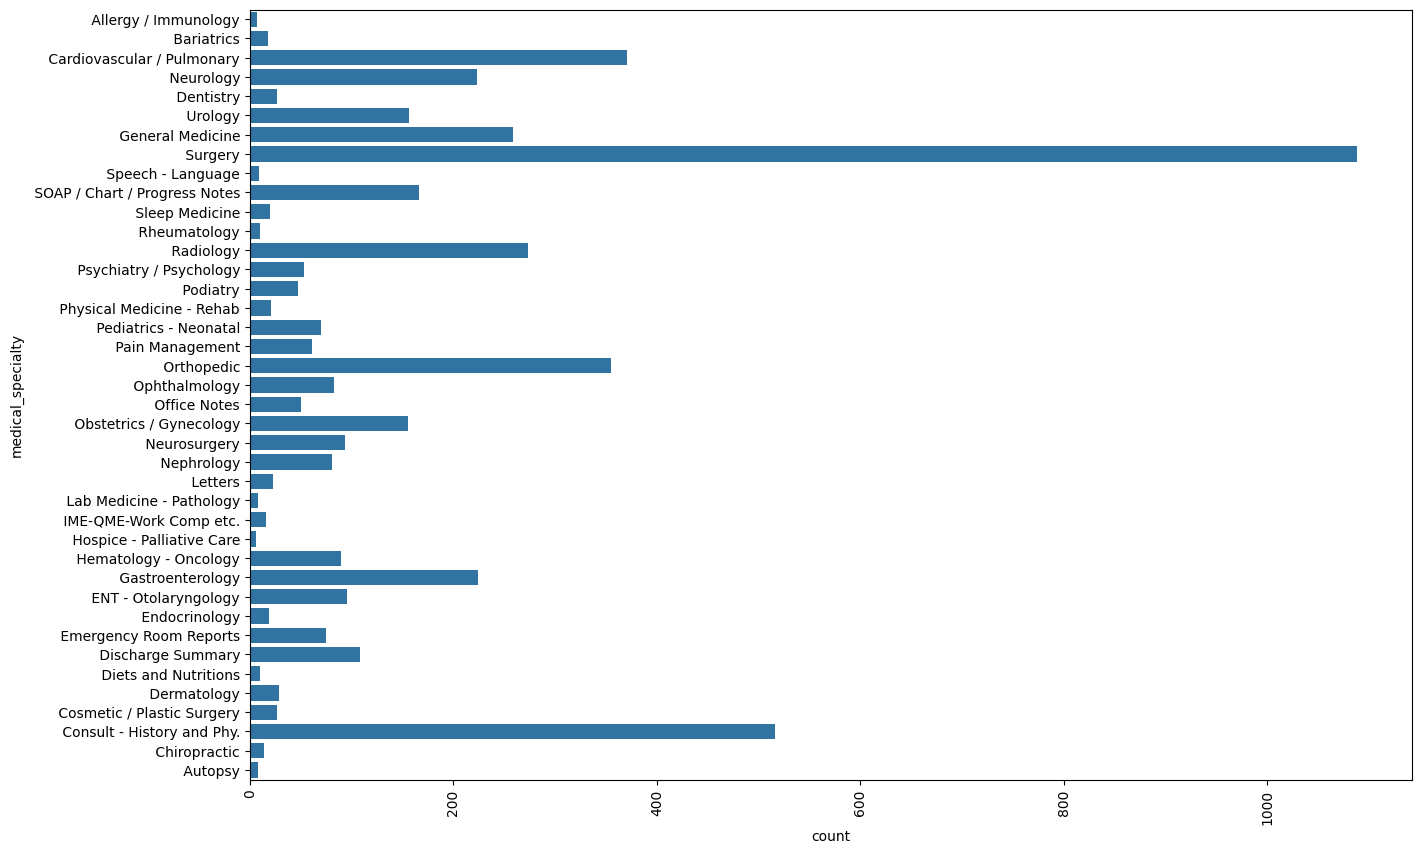

In [36]:
plt.figure(figsize=(15,10),)
sns.countplot(df['medical_specialty'])
plt.xticks(rotation=90)
plt.show()

In [37]:
df['medical_specialty'].unique()

array([' Allergy / Immunology', ' Bariatrics',
       ' Cardiovascular / Pulmonary', ' Neurology', ' Dentistry',
       ' Urology', ' General Medicine', ' Surgery', ' Speech - Language',
       ' SOAP / Chart / Progress Notes', ' Sleep Medicine',
       ' Rheumatology', ' Radiology', ' Psychiatry / Psychology',
       ' Podiatry', ' Physical Medicine - Rehab',
       ' Pediatrics - Neonatal', ' Pain Management', ' Orthopedic',
       ' Ophthalmology', ' Office Notes', ' Obstetrics / Gynecology',
       ' Neurosurgery', ' Nephrology', ' Letters',
       ' Lab Medicine - Pathology', ' IME-QME-Work Comp etc.',
       ' Hospice - Palliative Care', ' Hematology - Oncology',
       ' Gastroenterology', ' ENT - Otolaryngology', ' Endocrinology',
       ' Emergency Room Reports', ' Discharge Summary',
       ' Diets and Nutritions', ' Dermatology',
       ' Cosmetic / Plastic Surgery', ' Consult - History and Phy.',
       ' Chiropractic', ' Autopsy'], dtype=object)

In [39]:
#dropping columns that are not required.
filtered_data = filtered_categories[['transcription', 'medical_specialty']].dropna (subset=['transcription'])


In [81]:
filtered_data['medical_specialty'].unique()

array([ 0,  9, 20,  6, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  8,  7,  5,
        3,  4,  2,  1])

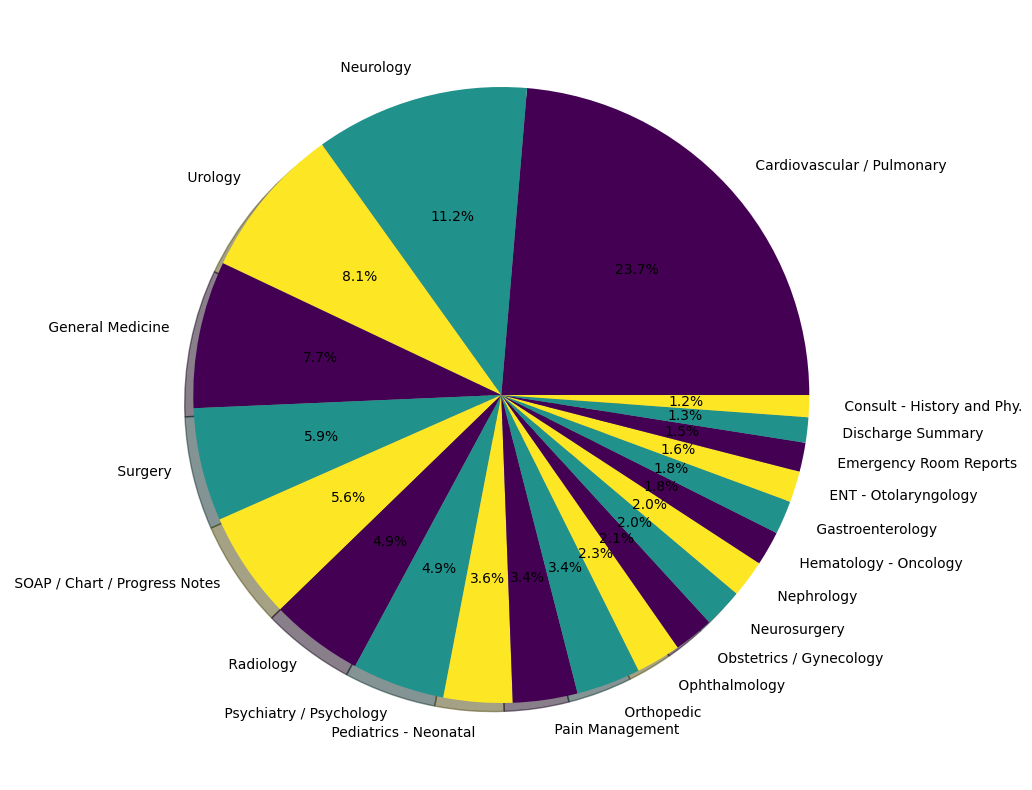

In [46]:
counts = filtered_data['medical_specialty'].value_counts()
labels = filtered_data['medical_specialty'].unique()
plt.figure(figsize=(15,10))

plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True, colors=plt.cm.viridis(np.linspace(0,1,3)))
plt.show()

# Exploring Transcription

In [56]:
# Resetting the index
filtered_data_reset = filtered_data.reset_index(drop=True,inplace=True)

In [58]:
filtered_data['medical_specialty'][0]

' Cardiovascular / Pulmonary'

In [59]:
filtered_data['transcription'][0]

'2-D M-MODE: , ,1.  Left atrial enlargement with left atrial diameter of 4.7 cm.,2.  Normal size right and left ventricle.,3.  Normal LV systolic function with left ventricular ejection fraction of 51%.,4.  Normal LV diastolic function.,5.  No pericardial effusion.,6.  Normal morphology of aortic valve, mitral valve, tricuspid valve, and pulmonary valve.,7.  PA systolic pressure is 36 mmHg.,DOPPLER: , ,1.  Mild mitral and tricuspid regurgitation.,2.  Trace aortic and pulmonary regurgitation.'

In [92]:
#filtered data null values

# Cleaning Data:                                      
1 Number,                                                
2 special letters,                                             
3 punctuations:                                             

In [73]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def clean_text(txt):
        r=re.sub('[^a-zA-Z]',' ',txt)
        r=r.lower()
        words=r.split()
        stemmed_words=[ps.stem(word)  for word in words if not word in set(stopwords.words('english'))]    #slow
        return ' '.join(stemmed_words)

In [74]:
filtered_data['transcription'] = df['transcription'].apply(lambda x: clean_text(x))

In [75]:
filtered_data['transcription'][0]

'subject year old white femal present complaint allergi use allergi live seattl think wors past tri claritin zyrtec work short time seem lose effect use allegra also use last summer began use two week ago appear work well use counter spray prescript nasal spray asthma doest requir daili medic think flare medic medic current ortho tri cyclen allegra allergi known medicin allergi object vital weight pound blood pressur heent throat mildli erythemat without exud nasal mucosa erythemat swollen clear drainag seen tm clear neck suppl without adenopathi lung clear assess allerg rhiniti plan tri zyrtec instead allegra anoth option use loratadin think prescript coverag might cheaper sampl nasonex two spray nostril given three week prescript written well'

In [93]:
#check null values and remove if it have

# words into categorical values

In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [77]:
le.fit(filtered_data['medical_specialty'])
filtered_data['medical_specialty'] = le.transform(filtered_data['medical_specialty'])

In [79]:
filtered_data.medical_specialty.unique()

array([ 0,  9, 20,  6, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  8,  7,  5,
        3,  4,  2,  1])

# Vectorization

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
filtered_data.dropna(inplace=True)
tfidf = TfidfVectorizer(analyzer='word', stop_words='english', ngram_range=(1, 3),max_df=0.75, use_idf=True, smooth_idf=True, max_features=1000)
tfidf_matrix=tfidf.fit_transform(filtered_data['transcription'].tolist())

# Splitting

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, filtered_data['medical_specialty'], test_size=0.2, random_state=42)

In [96]:
X_train.shape

(3652, 1000)

In [97]:
X_test.shape

(913, 1000)

# Now let’s train the model and print the classification report:

In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print(accuracy_score(y_test,ypred))

0.2683461117196057


In [74]:
ypred

array([20, 14, 15, 17, 15, 14, 10, 14, 15, 11,  6, 23,  4, 11, 13,  4, 19,
        8,  8,  9, 12, 11, 17, 22, 19, 16,  5,  8,  3, 24, 20, 18, 22,  7,
       23, 23, 22, 18,  7, 20, 10, 20, 14,  8, 15, 15,  8, 11,  4, 22,  1,
       24, 14, 15, 22, 23,  8, 15,  3, 17, 18,  3,  0, 15, 15, 15, 16, 21,
       13, 18, 12, 23, 22, 12, 13, 22,  8,  7, 19,  4, 24, 14,  7,  1, 24,
       13, 12, 10,  9,  8, 22,  9, 23, 11,  9, 23, 11, 15, 23, 13,  4, 17,
        2,  5,  6, 10,  0, 19, 20, 10, 22, 10, 15, 10, 15, 15, 22, 15, 14,
        6,  0,  4,  5,  7,  9, 13, 23,  6,  9,  9, 21, 11,  5,  3,  9, 24,
       19, 13,  8,  3, 13, 13, 11, 20, 16, 23, 21, 24,  7, 21, 20, 15, 22,
       19, 15, 23,  9, 15, 15,  6,  2, 20,  7, 11, 23, 24,  8,  3, 20,  2,
       10, 22, 15,  2, 11, 23,  1, 23,  6,  3,  3, 24, 24, 12,  5, 23, 18,
       22, 20, 20,  3,  6, 15])

# Training in Logistic Regression

In [104]:
category_list = filtered_data.medical_specialty.unique()


In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# Change parameters for Logistic Regression
clf = LogisticRegression(penalty='l2', solver='lbfgs',
random_state=42).fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
print(classification_report(y_test, y_test_pred,labels=category_list))

              precision    recall  f1-score   support

           0       0.28      0.38      0.32        77
           9       0.06      0.03      0.03        40
          20       0.20      0.03      0.05        35
           6       0.25      0.18      0.21        50
          19       0.48      0.76      0.59       233
          18       0.17      0.15      0.16        27
          17       0.37      0.43      0.40        60
          16       0.00      0.00      0.00         9
          15       0.44      0.21      0.29        19
          14       0.17      0.10      0.12        10
          13       0.21      0.21      0.21        57
          12       0.33      0.03      0.06        31
          11       0.32      0.25      0.28        28
          10       0.00      0.00      0.00        22
           8       0.00      0.00      0.00        17
           7       0.25      0.06      0.10        17
           5       0.15      0.17      0.16        36
           3       1.00    

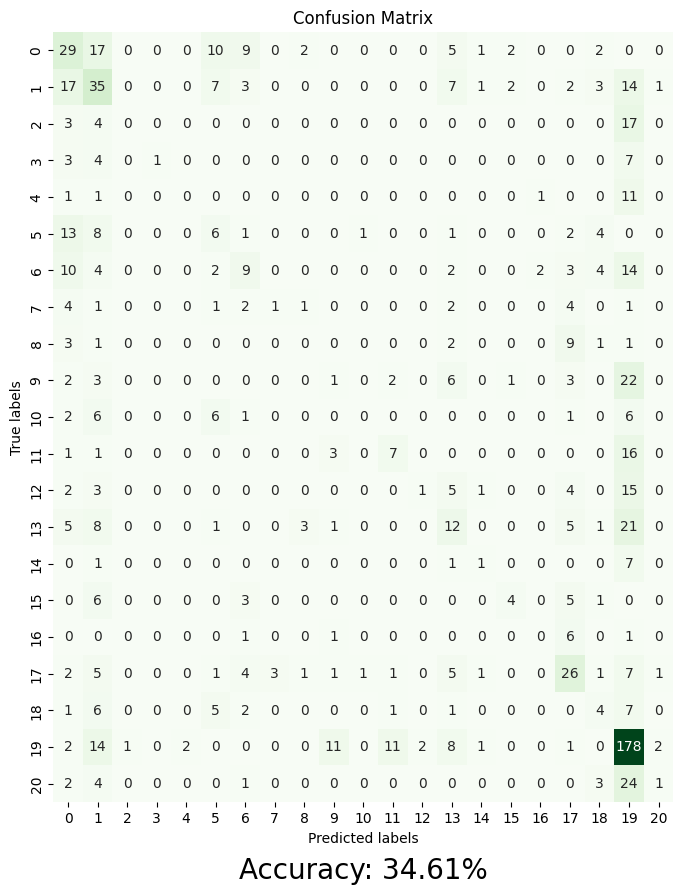

In [111]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Example confusion matrix (replace with your actual confusion matrix)
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)

# Plotting the confusion matrix with seaborn and matplotlib
plt.figure(figsize=(8, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Adding accuracy as a text annotation on the plot
plt.text(0.5, -0.1, f'Accuracy: {accuracy*100:.2f}%', fontsize=20, ha='center', transform=plt.gca().transAxes)

plt.show()


# Prediction System

In [112]:
import pickle
pickle.dump(tfidfd,open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))


NameError: name 'tfidfd' is not defined